In [336]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
RANDOM_SEED=25
df = pd.read_csv('data/filmdeathcounts.csv', sep=',')
df.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating
0,24 Hour Party People,2002,7,R,Biography|Comedy|Drama|Music,Michael Winterbottom,117,7.3
1,28 Days Later,2002,53,R,Horror|Sci-Fi|Thriller,Danny Boyle,113,7.6
2,28 Weeks Later,2007,212,R,Horror|Sci-Fi|Thriller,Juan Carlos Fresnadillo,100,7.0
3,30 Days of Night,2007,67,R,Horror|Thriller,David Slade,113,6.6
4,300,2007,600,R,Action|Fantasy|History|War,Zack Snyder,117,7.7


In [337]:
df.Director.describe()

count          545
unique         330
top       John Woo
freq            10
Name: Director, dtype: object

# Homework 4

In [338]:
# Homework 4, I
# Choose 3-6 features related to same aspect, explain
# Standardize - 
# Compute data scatter
# Determine contributions of all PC to data scatter, naturally and per cent

# Visualize the data using standardization via two versions
# a) over range
# b) over std
# When vizualizing select a pre-specified group of objects and make them of distinct colour
# Also apply conventional PCA (?)
# Explain how normalizations change the output

# Compute and interpret a hidden factor behind the selected features
# Express on a 100 rank scale

In [339]:
# We select these features because I want to 
features = ['Body_Count', 'IMDB_Rating', 'Year']

In [340]:
def normalize_range(vec):
    return (vec - vec.mean())/(vec.max() - vec.min())

def normalize_std(vec):
    return (vec - vec.mean())/(vec.std())

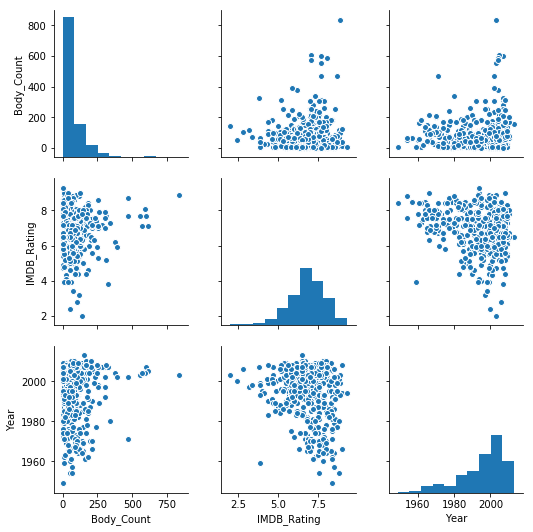

In [341]:
task_df = pd.DataFrame(df[features])
task_df_normalized_range = normalize_range(task_df)
task_df_normalized_std = normalize_std(task_df)
sns.pairplot(task_df, vars=features)

In [342]:
def data_scatter(x):
    return (x*x).sum().sum()

def pc_contrib(s):
    return np.power(s, 2)

def pc_contrib_rel(s, scatter):
    return pc_contrib(s) / scatter


Data scatter 39.739154735500485


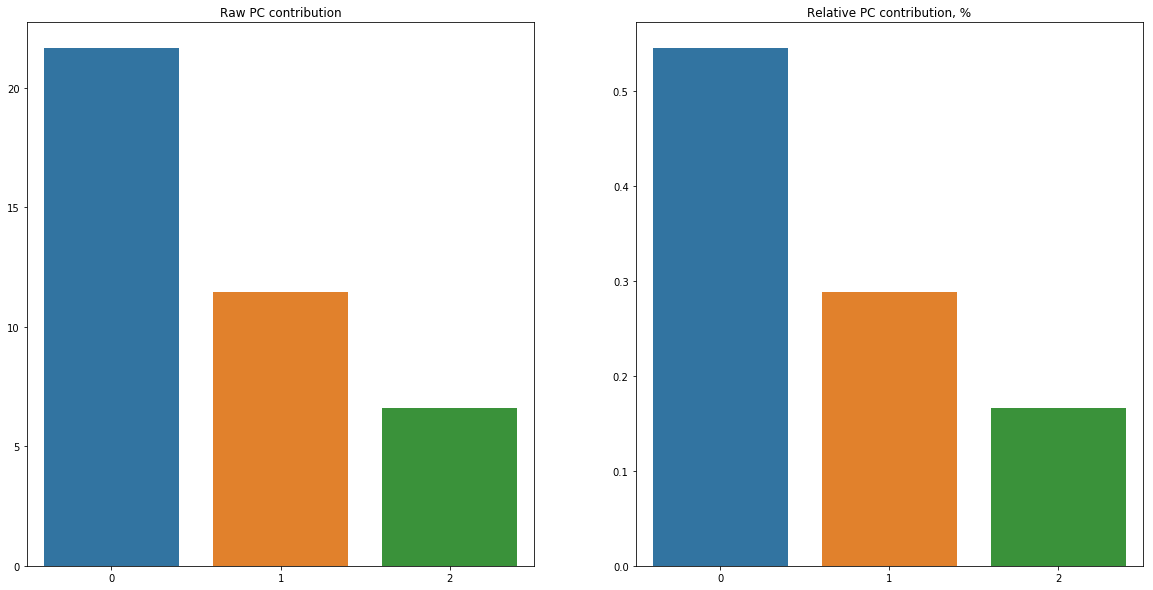

In [343]:
# PCA range
pc_range = PCA()
pc_range.fit(task_df_normalized_range)
scatter = data_scatter(task_df_normalized_range)
contibs = pd.Series([pc_contrib(s) for s in pc_range.singular_values_])
contibs_rel = pd.Series([pc_contrib_rel(s, scatter) for s in pc_range.singular_values_])
print('Data scatter', scatter)

fig = plt.figure(figsize=(20,10))
axes = fig.subplots(1, 2, sharex=True)
axes[0].set_title('Raw PC contribution')
sns.barplot(contibs.index, contibs.values, ax=axes[0])
axes[1].set_title('Relative PC contribution, %')
sns.barplot(contibs_rel.index, contibs_rel.values, ax=axes[1])

In [344]:
# PCA vizualization
# We will use cluster labels from homework 1 to see how PCA vizualizes them
labels_k5 = [2, 2, 2, 2, 4, 2, 0, 1, 1, 3, 1, 3, 3, 3, 2, 2, 1, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 2, 1, 2, 3, 0, 2, 2, 0, 1, 2, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 3, 1, 0, 2, 0, 1, 0, 2, 2, 2, 3, 0, 1, 3, 2, 1, 2, 2, 0, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 3, 3, 2, 1, 3, 2, 1, 1, 2, 1, 1, 2, 3, 1, 1, 0, 2, 2, 2, 0, 2, 2, 2, 3, 3, 0, 2, 3, 3, 3, 0, 2, 2, 1, 1, 3, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 3, 2, 2, 2, 2, 2, 3, 2, 1, 0, 2, 2, 2, 1, 0, 2, 4, 2, 1, 0, 0, 4, 1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 4, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 3, 1, 2, 2, 0, 4, 0, 1, 4, 2, 2, 2, 0, 2, 3, 2, 2, 1, 1, 1, 1, 1, 0, 0, 3, 2, 1, 1, 1, 1, 1, 0, 4, 4, 2, 2, 1, 1, 1, 3, 1, 0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 2, 2, 1, 3, 2, 2, 2, 1, 2, 1, 3, 2, 1, 2, 1, 0, 2, 3, 1, 3, 2, 0, 4, 0, 0, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 2, 3, 0, 3, 3, 4, 0, 0, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 3, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 2, 4, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2, 3, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 1, 3, 0, 0, 3, 0, 3, 0, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 4, 1, 1, 1, 0, 0, 2, 0, 2, 3, 3, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 3, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1, 3, 3, 0, 1, 3, 2, 2, 2, 2, 3, 3, 2, 0, 2, 1, 3, 2, 4, 2, 0, 2, 1, 0, 1, 2, 4, 0, 1, 3, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 3, 0, 4, 3, 2, 4, 3, 2, 3, 2, 0, 2, 2, 3]

In [345]:
# Here link to raw vizualization pairplot

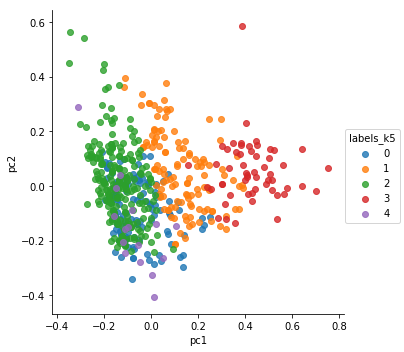

In [346]:
# PCA vizualization range
pc_range = PCA(n_components = 2)
pca_result = pc_range.fit_transform(task_df_normalized_range)
pca_result = pd.DataFrame(pca_result, columns=['pc1', 'pc2'])
pca_result['labels_k5'] = labels_k5
fig = plt.figure(figsize=(20,10))
sns.lmplot(x='pc1', y='pc2', fit_reg=False, hue='labels_k5', data=pca_result)

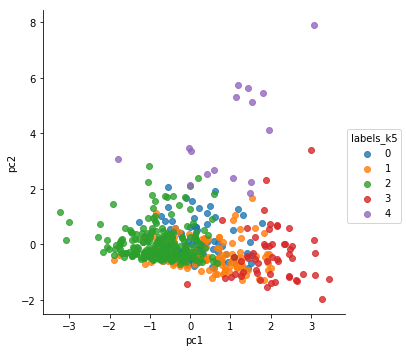

In [347]:
# PCA vizualization std
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(task_df_normalized_std)
pca_result = pd.DataFrame(pca_result, columns=['pc1', 'pc2'])
pca_result['labels_k5'] = labels_k5
fig = plt.figure(figsize=(20,10))
sns.lmplot(x='pc1', y='pc2', fit_reg=False, hue='labels_k5', data=pca_result)

In [348]:
# Clearly range is much better, we can distinguish all clusters vizually

In [349]:
# Conventional PCA
def conv_pca(X):
    X = X - X.mean(axis=0)
        
    covariance_matrix = (X.T.dot(X))/X.shape[0]
    
    eigvals, eigvectors = np.linalg.eig(covariance_matrix)
    order = np.argsort(eigvals)
    ind1, ind2 = order[-2:][::-1] # top 2 max eigvalues indices
    eigvectors = -eigvectors.T
    pc1 = X.dot(eigvectors[ind1])  / np.sqrt(X.shape[0]*abs(eigvals[ind1]))
    pc2 = X.dot(eigvectors[ind2])  / np.sqrt(X.shape[0]*abs(eigvals[ind2]))
    return pc1, pc2
# TOY DO NOT DELETE
# Also not include in report, duh
# X = pd.DataFrame([
#     [41, 66, 90],
#     [57, 56, 60],
#     [61, 72, 79],
#     [69, 73, 72],
#     [63, 52, 88],
#     [62, 83, 80]
# ])
#conv_pca(X)

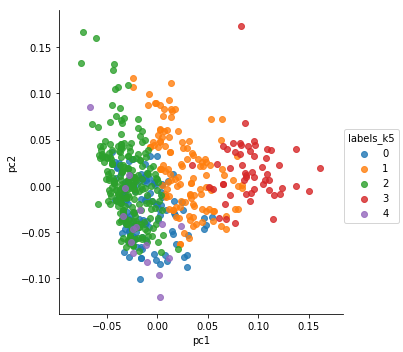

In [350]:
# Conv PCA range
pc1, pc2 = conv_pca(task_df_normalized_range)
pca_result = pd.DataFrame({'pc1': pc1, 'pc2': pc2, 'labels_k5': labels_k5})
fig = plt.figure(figsize=(20,10))
sns.lmplot(x='pc1', y='pc2', fit_reg=False, hue='labels_k5', data=pca_result)

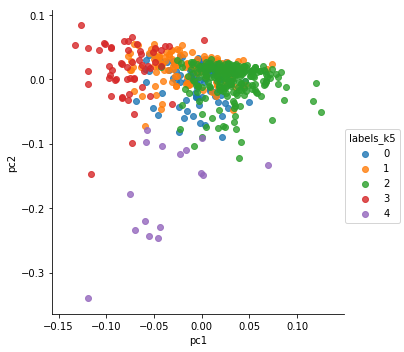

In [351]:
# Conv PCA std
pc1, pc2 = conv_pca(task_df_normalized_std)
pca_result = pd.DataFrame({'pc1': pc1, 'pc2': pc2, 'labels_k5': labels_k5})
fig = plt.figure(figsize=(20,10))
sns.lmplot(x='pc1', y='pc2', fit_reg=False, hue='labels_k5', data=pca_result)

In [352]:
# Hidden factor analysis
# Do not center data!
def get_feature_weights(X):
    u, s, vh = np.linalg.svd(X)
    z = abs(u[:, 0])
    sigma = max(s)
    c = abs(vh[:, 0])
    alpha = 1/c.sum()
    feature_weights = c*alpha
    contrib = sigma**2 / data_scatter(X)
    return feature_weights, contrib

weights, contrib = get_feature_weights(task_df)
print(list(task_df.columns))
print(contrib*100, weights.round(3)*100)



['Body_Count', 'IMDB_Rating', 'Year']
99.78585508347525 [ 3.5 96.4  0.1]
